# Applied Visualizations

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [10]:
plt.style.use('seaborn-colorblind')

## DataFrame.plot

In [11]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                   'B': np.random.randn(365).cumsum(0) + 20,
                   "C": np.random.randn(365).cumsum(0) - 20},
                  index = pd.date_range('1/1/2017', periods = 365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


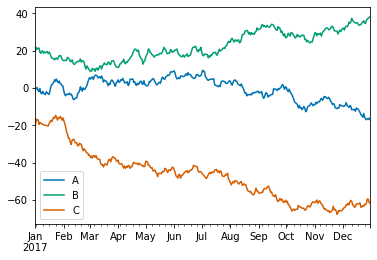

In [12]:
df.plot();

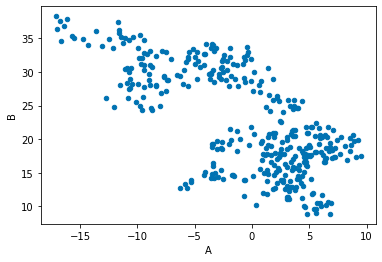

In [13]:
df.plot('A', 'B', kind='scatter');

Can also choose the plot kind by using the methods `dataframe.plot.kind` instead of providing kind parameter.

Make a scatterplot of A and C where the size of the marker depends on the value of B:

<AxesSubplot: xlabel='A', ylabel='C'>

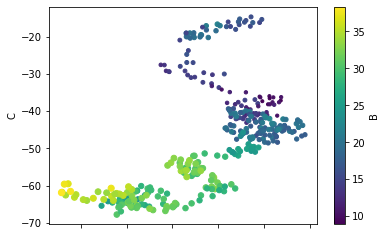

In [14]:
df.plot.scatter('A','C', c='B', s=df['B'], colormap='viridis')

Return type of df.plot.scatter is a matplotlib.axes._subplot. 

Here we can change the aspect ratio of the AxesSubplot to see that the range of series A is much smaller than series C:

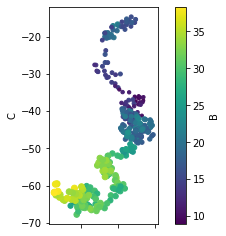

In [15]:
ax = df.plot.scatter('A','C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

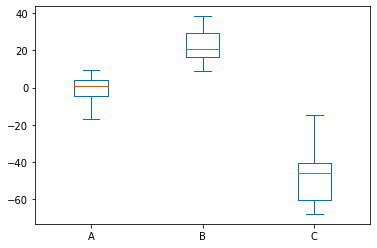

In [16]:
df.plot.box();

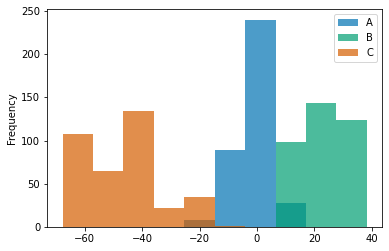

In [18]:
df.plot.hist(alpha=0.7);

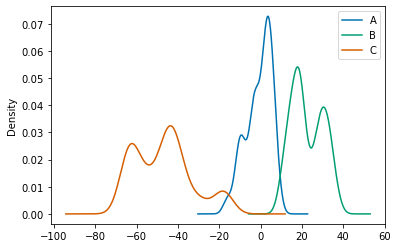

In [20]:
# Kernel Density Estimation (KDE) plot visualizes an estimate of a variable's pdf
## when you want to derive a smooth continuous function from a given sample
df.plot.kde();

## pandas.tools.plotting
Load in iris dataset which includes sepal and petal length/width for hundreds of samples of 3 species of the iris flower

In [21]:
iris = pd.read_csv('../assets/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Scatter Matrices
A scatter matrix is a way of comparing each column in a DataFrame to every other column in a pairwise fashion. In Python, the scatter matrix creates scatter plots between different variables and histograms along the diagonal.

In [22]:
pd.tools.plotting.scatter_matrix(iris);

AttributeError: module 'pandas' has no attribute 'tools'

### Parallel Coordinates
A common way of visualizing high dimensional multivariate data. 

Each variables in the dataset corresponds to an equally spaced parallel vertical line. The values of each variable are the connected by lines between for each individual observation.

In [23]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Name');

AttributeError: module 'pandas' has no attribute 'tools'

<Figure size 432x288 with 0 Axes>

Interpretation: since this kind of plot lets us see clustering >> we can see that petal length and petal width are two factors that segregate the different species. Iris setosa has the shortest and narrowest petals whereas. Iris virginica has the longest and widest petals.

# Seaborn
a powerful package for statistical plotting based on matplotlib

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1') # mean of 0, st. deviaton of 10, 1000 samples
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

Plot histograms of these two series side-by-side:

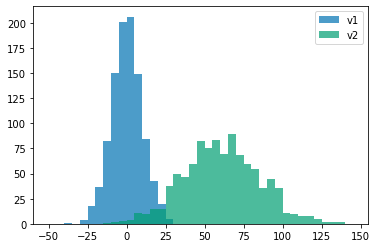

In [28]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

Visualize these histograms again but in a different way:

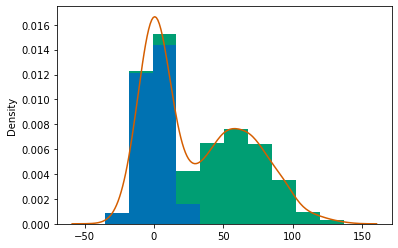

In [32]:
plt.figure()
plt.hist([v1,v2], histtype='barstacked', density=True); # setting normed=True will normalize the histogram to form a probability density
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3); # estimates the pdf of v3

## Distplot
Pass in the variables you want to visualize along with keyword arguments for each component of the plot (in this case the histogram and KDE)

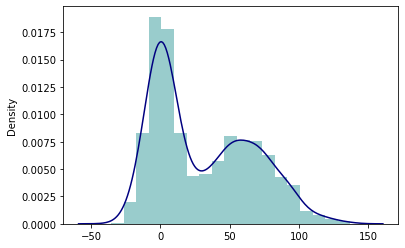

In [34]:
plt.figure()
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

## Jointplot
creates a scatterplot along the histograms for each individual variables on each axis. Lets you see the distribution of each variable on its own in addition to the relationships between variables.

We created these manually in Module 2.

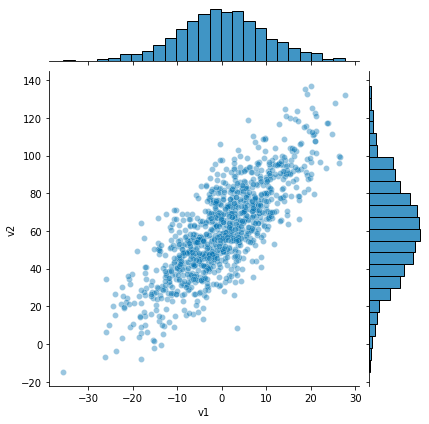

In [35]:
sns.jointplot(v1,v2, alpha=0.4)

Interpretation: v1 and v2 appear to be normally distributed variables that are positively correlated.

## Tweaking the Plots
Since seaborn uses matplotlib, we can tweak seaborn plots with matplotlib tools. Some of the plotting functions in Seaborn return a matplotlib axis object. While other operate on an entire figure and produce plots with several panels, returning a Seaborn grid object.

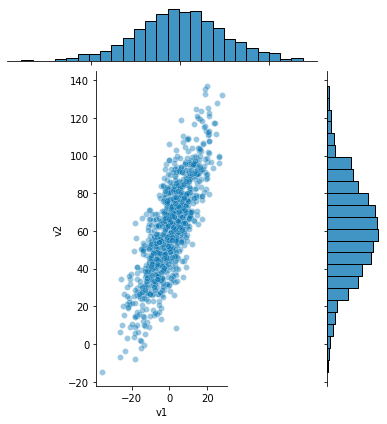

In [36]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

## Hexbin Plots
the bivariate counterpart to histograms. Show the number of observations that fall within hexagonal bins. Does well with large datasets.

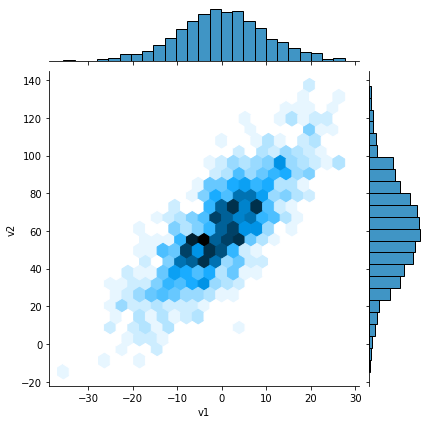

In [37]:
sns.jointplot(v1, v2, kind='hex')

## Kernel Density Estimations (KDE) Plots
Another way of visualizing the distribution of datasets.

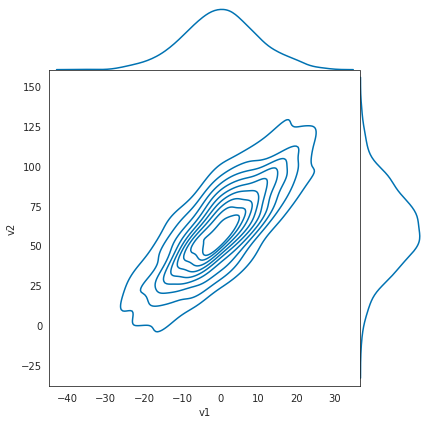

In [38]:
sns.set_style('white') # turns off gray grid

sns.jointplot(v1, v2, kind='kde', space=0); # space parameter draws the marginal distributions directly on the border of the scatterplot

## Plotting Categorical Data
do a scatter matrix with `sns.pairplot()`

In [39]:
iris = pd.read_csv('../assets/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


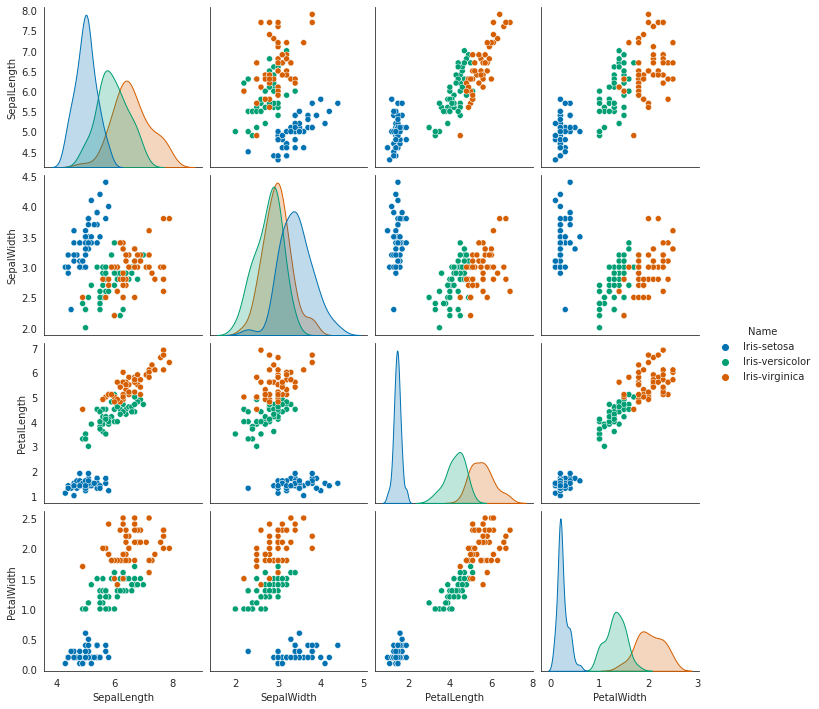

In [40]:
# hue parameter will map Name to different colors
# diag_kind will plot kde plot along the diagonals instead of default histogram

sns.pairplot(iris, hue='Name', diag_kind='kde')

Again, petal width and length are good options for separating observatons whereas sepal width is not.

## Violin Plots
more informative version of box plot, like a KDE plot on either side of a box plot. Can show you multimodality (multiple popular values)

Swarm plot is a scatterplot for categorical data.

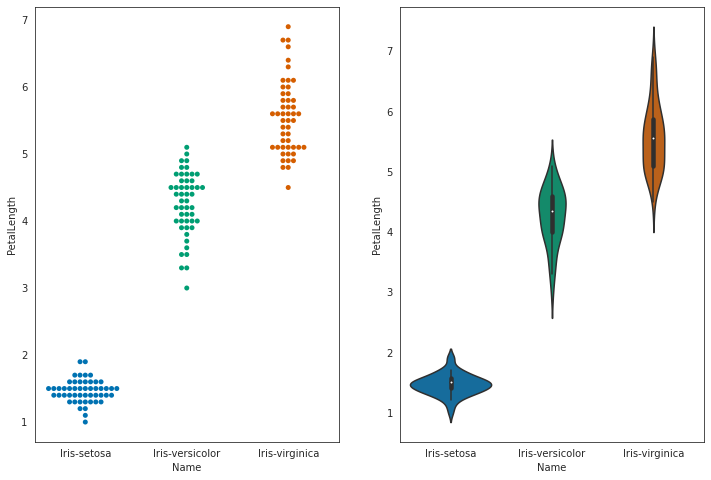

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);

# Mapping and Geographic Investigation (GIS)
using Dr. Brooks's cycling data

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# set matplotlib defaults in rcParams list (make sure you do this before using matplotlib >> so include at top of notebook)
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [16.0,8.0]

In [44]:
df = pd.read_csv('../assets/wipeout.csv')
df.head()

,timestamp,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp.1,position_lat_degrees,position_long_degrees
0,2019-11-01 20:12:03,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:03,42.280368,-83.740727
1,2019-11-01 20:12:04,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:04,42.280368,-83.740727
2,2019-11-01 20:12:07,NaN,0.00,281.6,0.000,NaN,87.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:07,42.280368,-83.740727
3,2019-11-01 20:12:08,NaN,0.32,281.6,1.036,NaN,88.0,504424447.0,-999065835.0,NaN,2019-11-01 20:12:08,42.280369,-83.740731
4,2019-11-01 20:12:10,NaN,3.30,281.8,2.976,NaN,89.0,504424476.0,-999066382.0,NaN,2019-11-01 20:12:10,42.280371,-83.740777


Projections = turning a round globe into a 2D rectangle

`position_lat` and `position_long` don't look familiar so we need to do a transformation (even though it's already done for us):

In [45]:
df['position_lat_degrees'] = df['position_lat'] * (180/2**31)
df['position_long_degrees'] = df['position_long'] * (180/2**31)

Since we're going to plot on top of a 2D image, we'll want to use the Mercantor projection. Convert from latitude in degrees to a flat Mercantor projection:

*Courtesy of OpenStreetMap*

In [46]:
import math
def lat2y(a):
    return 180.0/math.pi*math.log(math.tan(math.pi/4.0+a*(math.pi/180.0)/2.0))

df['position_lat_degrees_mercantor'] = df['position_lat_degrees'].apply(lat2y)

Drop anything with missing values. *May not what you would do in practice*

In [47]:
df=df[['timestamp','enhanced_altitude','enhanced_speed','heart_rate','position_lat_degrees_mercantor',
       'position_long_degrees','position_lat_degrees']].dropna()
df.head()

,timestamp,enhanced_altitude,enhanced_speed,heart_rate,position_lat_degrees_mercantor,position_long_degrees,position_lat_degrees
0,2019-11-01 20:12:03,281.6,0.000,84.0,46.739975,-83.740727,42.280368
1,2019-11-01 20:12:04,281.6,0.000,84.0,46.739975,-83.740727,42.280368
2,2019-11-01 20:12:07,281.6,0.000,87.0,46.739975,-83.740727,42.280368
3,2019-11-01 20:12:08,281.6,1.036,88.0,46.739976,-83.740731,42.280369
4,2019-11-01 20:12:10,281.8,2.976,89.0,46.739979,-83.740777,42.280371


Render an image behind an axis object and then use our regular plotting on top of axis object. For this to work, we need:
* an image
* to know the coordinates of the image bounds >> can set the **extend** which represents the map bounds

With this, our image behind the axis object will use the same coordinate system as the axis object itself and plot will be locked.

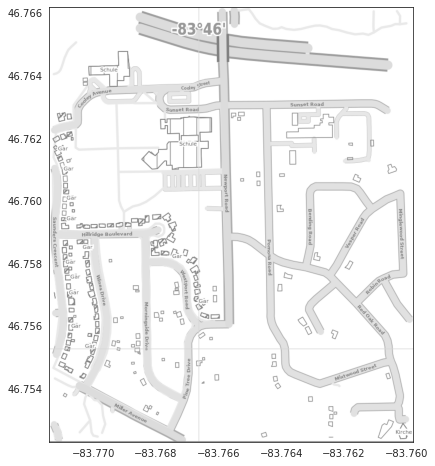

In [48]:
image=plt.imread("../assets/map.png")
plt.imshow(image, alpha=0.5, extent=[-83.77141,-83.75977,46.75230,46.76620])

# x and y labels are added because we set the extent parameter and set automatically by matplotlib

We can now plot on top of this map. Use the scatter function, add a colorbar, and change the values of the dots being plotted based on the heart rate column of data:

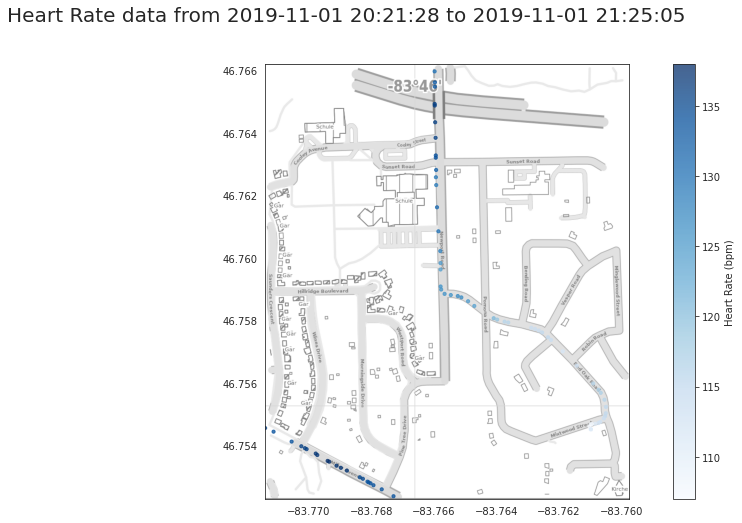

In [52]:
image=plt.imread("../assets/map.png")
plt.imshow(image, alpha=0.5, extent=[-83.77141,-83.75977,46.75230,46.76620])

# only plot points that would actually appear on the map based on extent parameters
small_df = df[(df['position_long_degrees'] > -83.77141) &
              (df['position_long_degrees'] < -83.75977) &
              (df['position_lat_degrees_mercantor'] > 46.75230) &
              (df['position_lat_degrees_mercantor'] < 46.76620)]

# plot longitude and mercantor-projected latitude data
# set the series of data we want to be the colors of points using the c parameter
# choose different color maps using cmap parameter
plt.scatter(small_df['position_long_degrees'], small_df['position_lat_degrees_mercantor'],
            s=10, c=small_df['heart_rate'], cmap='Blues', alpha=0.75)

# get pyplot to render a colorbar so we know the meaning of the colors
plt.colorbar().set_label('Heart Rate (bpm)')

plt.suptitle('Heart Rate data from {} to {}'.format(np.min(small_df['timestamp']), np.max(small_df['timestamp'])), size='20');

Use the same code but plot all the data points:

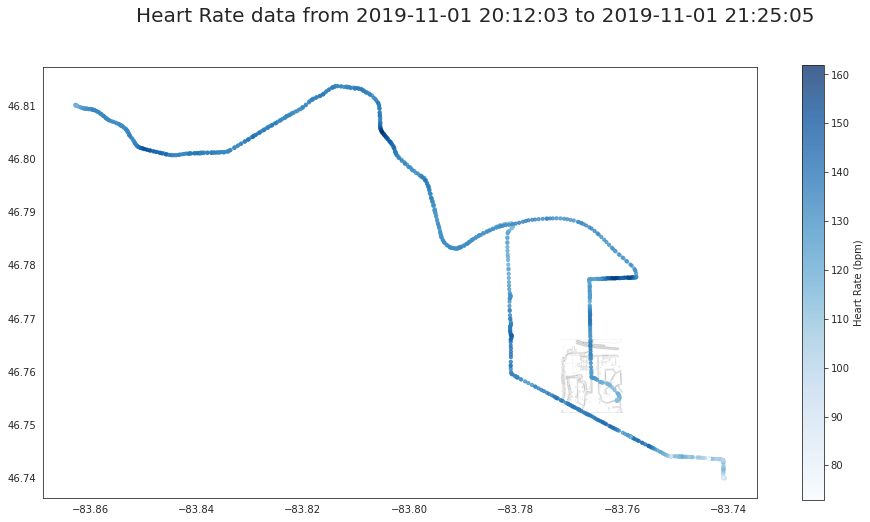

In [54]:
image=plt.imread("../assets/map.png")
plt.imshow(image, alpha=0.5, extent=[-83.77141,-83.75977,46.75230,46.76620])

# plot longitude and mercantor-projected latitude data
# set the series of data we want to be the colors of points using the c parameter
# choose different color maps using cmap parameter
plt.scatter(df['position_long_degrees'], df['position_lat_degrees_mercantor'],
            s=10, c=df['heart_rate'], cmap='Blues', alpha=0.75)

# get pyplot to render a colorbar so we know the meaning of the colors
plt.colorbar().set_label('Heart Rate (bpm)')

plt.suptitle('Heart Rate data from {} to {}'.format(np.min(df['timestamp']), np.max(df['timestamp'])), size='20');

### Tile Servers
creates a matrix of maps with different zoom levels and then serve up portions of the maps, the tiles as requested by the client.

In [55]:
import folium

# render a spot from our previous map (chose the center point)
m = folium.Map(location=[42.24, -83.764], zoom_start=12) 
# longitude and latitude had to be flipped for this library AND don't need to use mercantor changed values for longitude
display(m)

### Map Callouts
Use the Marker class to add callouts to the map.

Use the Polyline class to add the route
* Polyline class takes a list of locations as tuples, which means we have to combine our latitude and longitude values pairwise >> use `zip()`

In [56]:
m=folium.Map(location=[42.296, -83.768], zoom_start=15)
folium.Marker([df['position_lat_degrees'].iloc[0], df['position_long_degrees'].iloc[0]],
              popup='Start').add_to(m)
folium.Marker([df['position_lat_degrees'].iloc[-1], df['position_long_degrees'].iloc[-1]],
              popup='Stop').add_to(m)

# add route
route = folium.PolyLine(locations = zip(df['position_lat_degrees'], df['position_long_degrees']),
                        weight = 5, color='blue').add_to(m)

display(m)

`zip(A, B)` goes item-by-item marrying A and B together and turn it into a sequence: (A1,B1), (A2,B2), ...